Decision Tree Algorithm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
from sklearn.model_selection import cross_val_predict

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [3]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
18,23,M,LOW,HIGH,7.298,drugC
193,72,M,LOW,HIGH,6.769,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
89,50,F,NORMAL,NORMAL,17.211,drugY
178,39,M,NORMAL,HIGH,15.969,drugY
38,39,F,NORMAL,NORMAL,9.709,drugX
136,55,F,HIGH,HIGH,10.977,drugB
109,23,M,NORMAL,HIGH,16.850,drugY
198,23,M,NORMAL,NORMAL,14.020,drugX
96,58,F,LOW,HIGH,38.247,drugY


In [4]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)

df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
191,23,1,0,0,8.011,drugA
187,47,1,0,0,10.403,drugA
166,58,0,1,0,26.645,drugY
42,50,1,2,1,15.790,drugY
150,49,1,0,1,8.700,drugA
185,57,0,2,1,25.893,drugY
4,61,0,1,0,18.043,drugY
33,65,0,0,1,31.876,drugY
132,49,1,1,1,13.598,drugX
128,47,1,1,1,33.542,drugY


In [5]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
X[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [6]:
y = df['Drug'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [8]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = tree_model.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [11]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.95


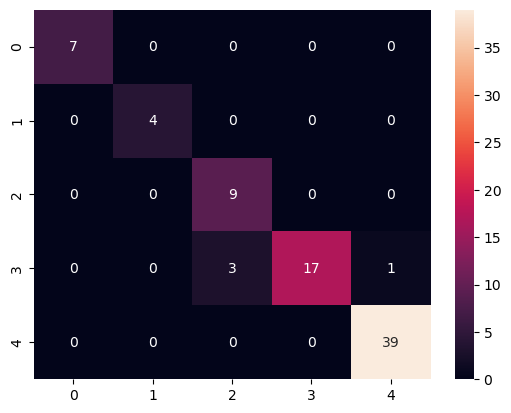

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [13]:
predict = cross_val_predict(tree_model, X=X, y=y, cv=5)
print("Classification Report:", classification_report(y, predict))

Classification Report:               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



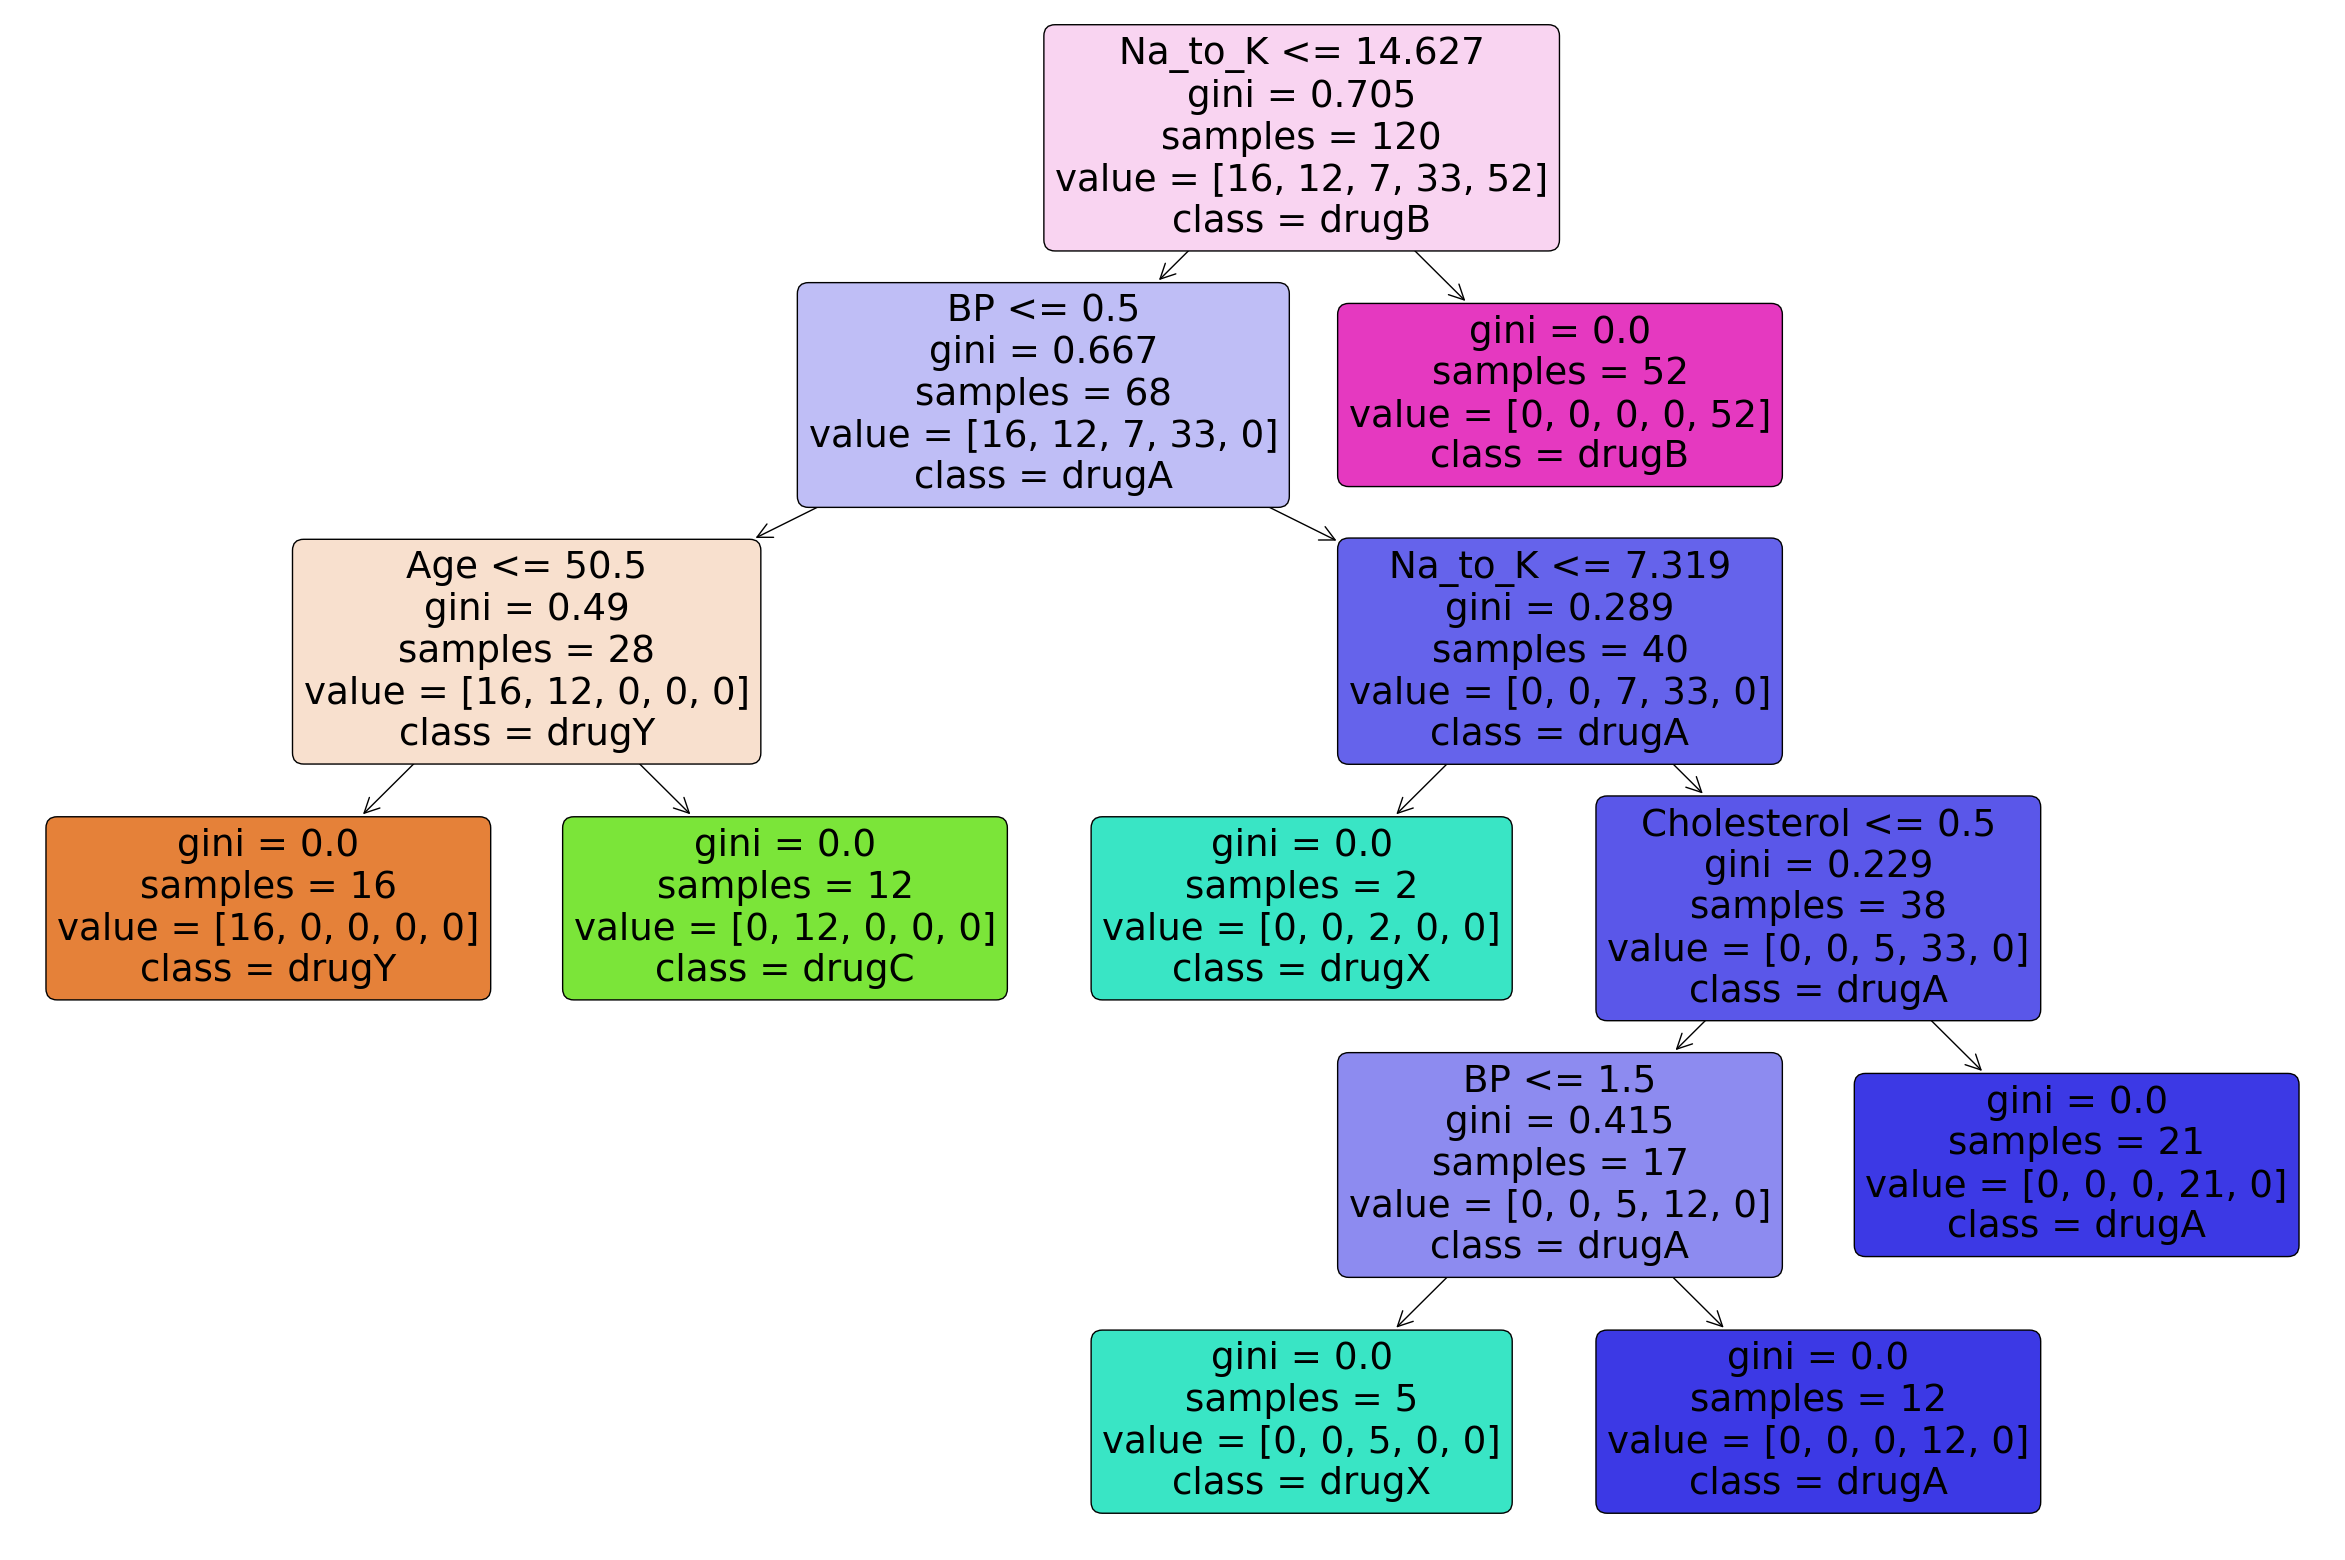

In [14]:
cols = df.drop("Drug", axis=1).columns
classes = df["Drug"].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True, rounded=True)
plt.show()

Hyperparameters

In [ ]:
tree_model